# Amazon Supplement Comparison with Web Scraping
*** 
In this analysis, I will be web scraping for information from four top supplement companies on the supplement Ashwagandha. Ashwagandha is a supplement I chose for this analysis since I'm familiar with it and I've used it from two different brands before. Still, any supplement would work for this. I decided to look at the overall rating on Amazon, the price, and then the true rating, discounting fake reviews using Fakespot to compare the actual rating with the price for each company. The goal is to see the real rating and then factor in the price to see which company will give you the best bang for your buck.

In [20]:
import random
import re
import requests
import time
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

def find_price(soup):
    price_selectors = [
        {'id': 'price_inside_buybox'},
        {'id': 'priceblock_ourprice'},
        {'id': 'priceblock_dealprice'},
        {'class': 'a-price-whole'}
    ]

    for selector in price_selectors:
        price_element = soup.find('span', selector)
        if price_element:
            return price_element.text.strip()
    return "Price not found"

urls = [
    "https://www.amazon.com/Nature-Made-Ashwagandha-Capsules-Reduction/dp/B085V66GKY/ref=sr_1_6?keywords=ashwagandha+supplement&qid=1682557689&sr=8-6",
    "https://www.amazon.com/NOW-Supplements-Ashwagandha-somnifera-Standardized/dp/B0013OQIJY/ref=sr_1_9?keywords=ashwagandha%2Bsupplement&qid=1682557689&sr=8-9&th=1",
    "https://www.amazon.com/Jarrow-Formulas-Ashwagandha-Supports-Resistance/dp/B0013OQEO8/ref=sr_1_29?keywords=ashwagandha%2Bsupplement&qid=1682557705&refinements=p_72%3A1248903011&rnid=1248901011&s=hpc&sr=1-29&th=1",
    "https://www.amazon.com/Pure-Encapsulations-Ashwagandha-Cardiovascular-Occasional/dp/B0016LIL8A/ref=sr_1_38?keywords=ashwagandha%2Bsupplement&qid=1682557715&refinements=p_72%3A1248903011&rnid=1248901011&s=hpc&sr=1-38&th=1"
]

ua = UserAgent()

for url in urls:
    HEADERS = {
        'User-Agent': ua.random,
        'Accept-Language': 'en-US, en;q=0.5'
    }
    html = requests.get(url, headers=HEADERS)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    title_element = soup.find('span', {'id': "productTitle"})
    title = title_element.text.strip() if title_element else "Title not found"
    
    price = find_price(soup)
    
    description_element = soup.find('div', {'id': "productDescription"})
    description = description_element.text.strip() if description_element else "Description not found"

    print(f"Title: {title}")
    print(f"Price: {price}")
    print(f"Description: {description}\n")

    time.sleep(random.uniform(1, 5))


Title: Nature Made Ashwagandha Capsules 125mg for Stress Support, 60 Capsules, 60 Day Supply
Price: 10.
Description: Nature Made Ashwagandha Capsules are dietary supplements using clinically studied Sensoril Ashwagandha to reduce stress and occasional anxiousness (1). Sourced from high-quality ingredients, this gluten free Ashwagandha for men and women dietary supplement contains no color added, no artificial flavors and no preservatives. Long revered in Ayurvedic medicine, ashwagandha helps reduce stress. These Nature Made stress supplements contain Sensoril Ashwagandha, which reduces perceived stress and cortisol to help restore balance to the adrenals. This Ashwaganda leaf and root extract is more concentrated than standard Ashwagandha root extract (2). Adaptogens such as Ashwagandha may help the body adapt to and reduce stress. These Ashwagandha supplements are perfect for any adult looking to help reduce stress in their lives. Adults, take one Ashwagandha capsule daily with water.

Here we have four top brands that sell Ashwagandha: Nature Made, NOW Supplements, Jarrow Formulas, and Pure Encapsulations. There is quite a disparity in price, ranging from $8 up to $44. The overall rating is the next thing to look at beyond price with these brands. This is because a cheap supplement could have a rating of 4.7, while a pricier supplement, such as Pure Encapsulations at $44, could have an overall rating of 2.3.

In [22]:
import random
import requests
import time
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

def find_overall_rating(soup):
    rating_element = soup.find('span', {'class': 'a-icon-alt'})
    if rating_element:
        rating_text = rating_element.text.strip()
        return rating_text.split(' ')[0]
    return "Rating not found"

urls = [
    "https://www.amazon.com/Nature-Made-Ashwagandha-Capsules-Reduction/dp/B085V66GKY/ref=sr_1_6?keywords=ashwagandha+supplement&qid=1682557689&sr=8-6",
    "https://www.amazon.com/NOW-Supplements-Ashwagandha-somnifera-Standardized/dp/B0013OQIJY/ref=sr_1_9?keywords=ashwagandha%2Bsupplement&qid=1682557689&sr=8-9&th=1",
    "https://www.amazon.com/Jarrow-Formulas-Ashwagandha-Supports-Resistance/dp/B0013OQEO8/ref=sr_1_29?keywords=ashwagandha%2Bsupplement&qid=1682557705&refinements=p_72%3A1248903011&rnid=1248901011&s=hpc&sr=1-29&th=1",
    "https://www.amazon.com/Pure-Encapsulations-Ashwagandha-Cardiovascular-Occasional/dp/B0016LIL8A/ref=sr_1_38?keywords=ashwagandha%2Bsupplement&qid=1682557715&refinements=p_72%3A1248903011&rnid=1248901011&s=hpc&sr=1-38&th=1"
]

ua = UserAgent()

for url in urls:
    HEADERS = {
        'User-Agent': ua.random,
        'Accept-Language': 'en-US, en;q=0.5'
    }
    html = requests.get(url, headers=HEADERS)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    title_element = soup.find('span', {'id': "productTitle"})
    title = title_element.text.strip() if title_element else "Title not found"
    
    overall_rating = find_overall_rating(soup)

    print(f"Title: {title}")
    print(f"Overall Rating: {overall_rating}\n")

    time.sleep(random.uniform(1, 5))


Title: Nature Made Ashwagandha Capsules 125mg for Stress Support, 60 Capsules, 60 Day Supply
Overall Rating: 4.5

Title: NOW Supplements, Ashwagandha (Withania somnifera) 450 mg (Standardized Extract), 90 Veg Capsules
Overall Rating: 4.5

Title: Jarrow Formulas Ashwagandha 300 mg - 120 Veggie Capsules - Overall Health & Resistance to Fatigue - Supplement Supports Endurance, Muscle Recovery & Cognitive Health - 60 Servings (PACKAGING MAY VARY)
Overall Rating: 4.6

Title: Pure Encapsulations Ashwagandha | Supplement for Thyroid Support, Joints, Adaptogens, Focus, and Memory* | 120 Capsules
Overall Rating: 4.7



Here the overall rating for the four companies is about the same, ranging from 4.5 to 4.7. So there's little difference in rating that's tangible to equate to a better choice. With the rating for all four companies being about the same, it begs the question of the price. If the brand NOW is at a 4.5 rating at $8 for 90 capsules at 450mg, and Pure Encapsulations is selling 120 capsules with a 4.7 rating, the clear choice for overall quality and bang for your buck goes to NOW. 

One thing you will notice beyond the price and rating is the number of capsules and the overall dosage amount for each capsule. Some brands have 60 capsules, such as Nature Made, and then we go to 120 capsules with Pure Encapsulations. That's one thing to consider when choosing a brand for the same product. There is one crucial thing, though, that we need to look at with these products that can make a big difference—fake reviews.

Various companies allow you to check legitimate reviews of products on websites such as Amazon. One of these that I will be using to check the validity of these reviews, at least to a degree, is a Chrome extension called "Fakespot." Fakespot will use specific parameters that adjust the overall rating of an Amazon product to a more accurate rating after accounting for fake reviews. The way it looks at said parameters are:

"The tool works by analyzing the reviewers and reviews, and searching for suspicious grammatical and spelling mistakes. In addition, it checks the number of reviews, mismatched dates, purchasing patterns, and other signs of illegal activity. For example, if someone decides to leave a review with repeats of the words "amazing" and "great," there are higher chances that the review Is "unreliable."

Here's a statistic that shows how critical reviews are when someone is looking to purchase on Amazon:

"In a survey, 78% of people who buy through Amazon said that reading product reviews are an integral step during the purchasing process." (https://www.pcmag.com/how-to/spot-a-fake-review-on-amazon)

In [29]:
products = [
    {
        'title': 'Nature Made',
        'overall_rating': 4.5,
        'price': 10.00,
        'fakespot_rating': 2.0
    },
    {
        'title': 'NOW Supplements',
        'overall_rating': 4.5,
        'price': 8.00,
        'fakespot_rating': 4.5
    },
    {
        'title': 'Jarrow Formulas',
        'overall_rating': 4.6,
        'price': 15.00,
        'fakespot_rating': 2.0
    },
    {
        'title': 'Pure Encapsulations',
        'overall_rating': 4.7,
        'price': 44.00,
        'fakespot_rating': 2.5
    }
]

df = pd.DataFrame(products)


We created a data frame with the products dictionary above to compare the overall rating with the Fakespot rating for each company. Then we put them side-by-side to see how far off or accurate the Amazon ranking is to its actual rank after using Fakespot.

In [30]:
df = pd.DataFrame(products)

avg_overall_rating = df['overall_rating'].mean()
avg_fakespot_rating = df['fakespot_rating'].mean()

highest_rated_product = df.loc[df['overall_rating'].idxmax()]
lowest_rated_product = df.loc[df['overall_rating'].idxmin()]

highest_fakespot_rated_product = df.loc[df['fakespot_rating'].idxmax()]
lowest_fakespot_rated_product = df.loc[df['fakespot_rating'].idxmin()]

highest_priced_product = df.loc[df['price'].idxmax()]
lowest_priced_product = df.loc[df['price'].idxmin()]

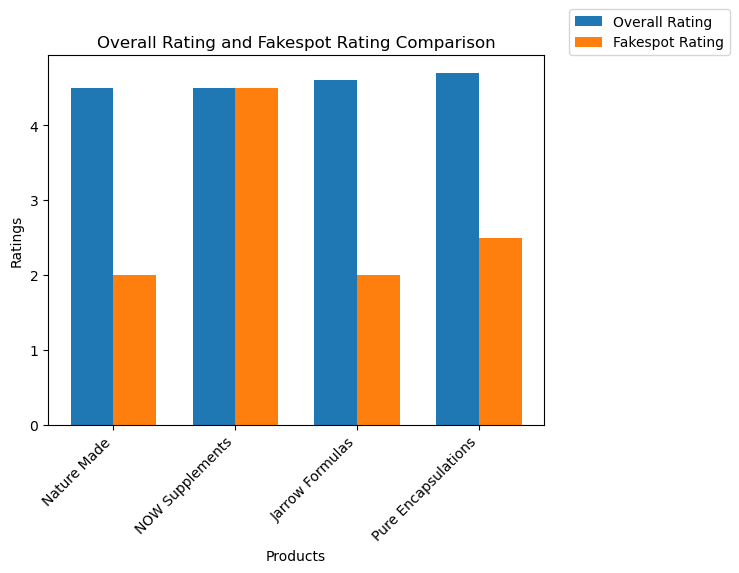

In [32]:
import numpy as np

index = np.arange(len(df))

bar_width = 0.35

fig, ax = plt.subplots()
overall_bar = ax.bar(index, df['overall_rating'], bar_width, label='Overall Rating')
fakespot_bar = ax.bar(index + bar_width, df['fakespot_rating'], bar_width, label='Fakespot Rating')

ax.set_xlabel('Products')
ax.set_ylabel('Ratings')
ax.set_title('Overall Rating and Fakespot Rating Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['title'], rotation=45, ha='right')
ax.legend(loc=(1.05, 1))

plt.show()


Here we have a side-by-side comparison that we can see visually in a bar graph of the overall rating Amazon shows for the product for each company on their website and the Fakespot rating, which is more akin to the actual rating. One thing to mention is that any program meant to spot fake or dodgy reviews can have false positives to an unknown degree. With this in mind, though, Fakespot's rating will be closer to the actual rating, but it could be off a bit in fairness.

However, we can see three out of the four companies have quite a lower rating with Fakespot. Nature Made, Jarrow Formulas, and Pure Encapsulations ratings go down to 2-2.5. One company, though, has the same rating as Fakespot: NOW Supplements. They have a 4.5 rating on Amazon and a 4.5 rating with Fakespot, which is impressive that it holds the same rating. One thing to mention is that NOW Supplements Ashwagandha supplement is only $8. With this in mind, the company with the best price and true rating, still sitting at 4.5, would be NOW Supplements. Even not accounting for the total number of capsules and dosage in each capsule, NOW Supplement is far ahead of the other three companies regarding true rating and price. The thing that stands out, though, is that my family and I use Pure Encapsulations for a few of our supplements, and it does make me wonder, since I've never used Fakespot before, how bad the purchases are. Not only from a rating standpoint, Pure Encapsulations is one of the most expensive brands out there. They advertise themselves as being pure with no fillers, and it's a mask in the sense it seems to make their supplements expensive in doing so. I started using NOW for supplements other than Ashwagandha and felt more from their supplement of L-Tryptophan than Pure Encapsulations version of the same supplement, and the price of NOW's was less than half the price of Pure Encapsulations. 

My intention with this was to practice web scraping since it's something I've dabbled in but haven't done much of, but to also see how helpful Fakespot can be along with combining it and the price of various supplement companies' prices for the same supplement to make sure I'm getting the best deal when it comes to legitimacy and quality. It was an eye-opener to see that brands will try to make themselves look like a pure company and aren't necessarily the most genuine regarding how they price their supplements and how you need to shop around and do research so that you are getting the best deal, especially when it comes to shopping online.